In [1]:
import re
import time
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
BASE_URL = "http://books.toscrape.com/"
session = requests.Session()

resp = session.get(BASE_URL, timeout=30)
resp.status_code


200

In [3]:
soup = BeautifulSoup(resp.text, "html.parser")
type(soup)

bs4.BeautifulSoup

In [4]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html), books_html[0].name

(20, 'article')

In [26]:
def parse_rating(rating_classes):
    
    mapping = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
    for c in rating_classes:
        if c in mapping:
            return mapping[c]
    return np.nan

In [27]:
import re

def parse_price(book_tag):
    price_text = book_tag.find("p", class_="price_color").get_text(strip=True)
   
    m = re.search(r"(\d+\.\d+)", price_text)
    return float(m.group(1)) if m else np.nan

In [28]:
t, p, r = parse_book(books_html[0])
t, p, r

('A Light in the Attic', 51.77, 3)

In [32]:
books_dict = {"Title": [], "Price": [], "Rating": []}

for book in books_html:
    title, price, rating = parse_book(book)
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

books_df = pd.DataFrame(books_dict)
books_df.head()

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


In [33]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [34]:
len(books_dict)          # 3 key:value çifti olmalı

3

In [35]:
len(books_dict["Title"]) # Her listede 20 kitap olmalı

20

## Pandas'a Veri Yükleme 

In [36]:
books_df = pd.DataFrame(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


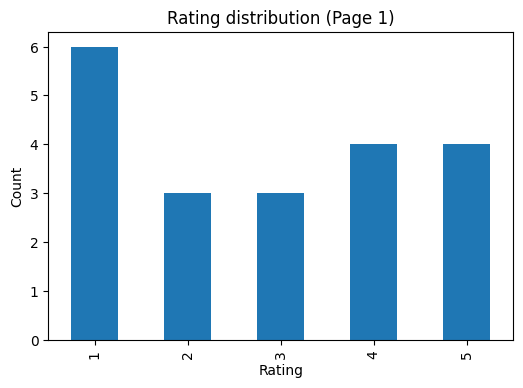

In [39]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar", figsize=(6,4), title="Rating distribution (Page 1)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/data-book-scraping/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.81s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master



 ## Tüm katalog sayfalarını gezmek

In [53]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [54]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [56]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 50
for page in range(1, MAX_PAGE + 1):
    
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("Done!")

Done!


In [57]:
len(all_books_dict["Title"])

1000

In [58]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1
999,"1,000 Places to See Before You Die",26.08,5


<Axes: >

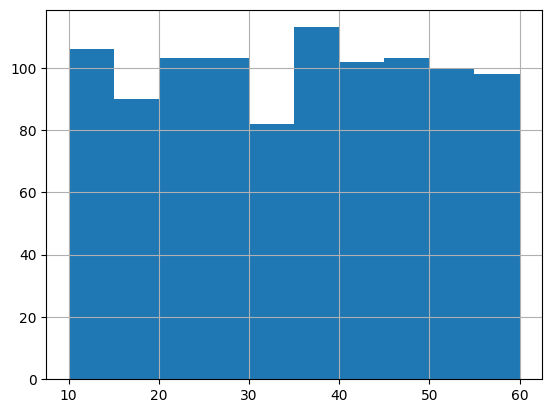

In [59]:
all_books_df["Price"].hist()

<Axes: xlabel='Rating'>

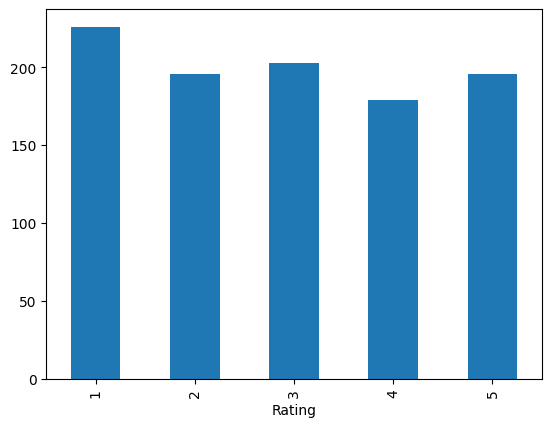

In [60]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [65]:
all_books_df.to_csv("books.csv", index=False)
all_books_df.to_excel("books.xlsx", index=False, sheet_name="Books")

In [66]:
!pip install XlsxWriter

In [68]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')